# 2.8.3 Transformaciones invertibles (biyecciones)

## 2.8.3.1 Cambio de variables: caso escalar

**Fórmula de cambio de variable:** $\;$ normaliza con el valor absoluto de la derivada de la inversa
$$p_y(y)=p_x(g(y))\left\vert\dfrac{dg(y)}{dy}\right\vert$$

**Ejemplo:** $\quad x\sim\operatorname{Unif}(0,1),\quad y=f(x)=2x+1\quad\to\quad x=g(y)=(y-1)/2$
$$p_y(y)=p_x(g(y))\frac{1}{2}=\mathbb{I}(g(y)\in(0,1))\frac{1}{2}=\mathbb{I}(y\in(1,3))\frac{1}{2}=\operatorname{Unif}(1,3)$$

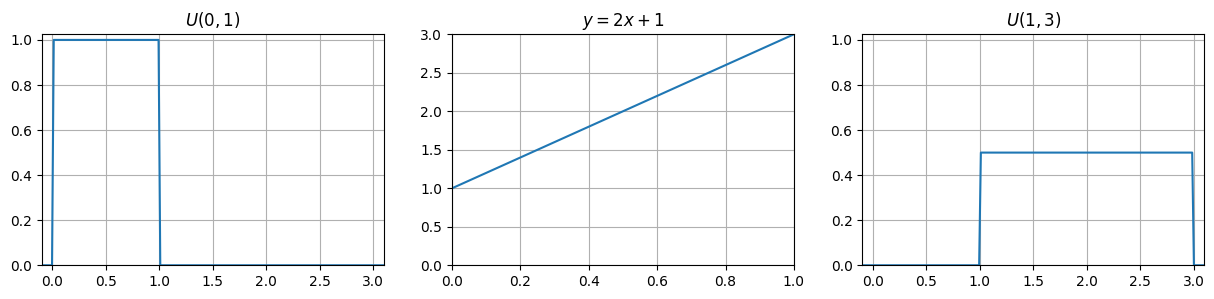

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import uniform
X = uniform(loc=0, scale=1); x = np.linspace(-0.1, 3.1, 200);
fig, axs = plt.subplots(1, 3, figsize=(15,3))
ax = axs[0]; ax.grid(); ax.set_xlim(-0.1, 3.1); ax.set_ylim(0, 1.025)
ax.set_title(r'$U(0, 1)$'); ax.plot(x, X.pdf(x))
ax = axs[1]; ax.grid(); ax.set_xlim(0, 1); ax.set_ylim(0, 3)
y = 2 * x + 1; ax.set_title(r'$y=2x+1$'); ax.plot(x, y);
ax = axs[2]; ax.grid(); ax.set_xlim(-0.1, 3.1); ax.set_ylim(0, 1.025)
Y = uniform(loc=1, scale=2); ax.set_title(r'$U(1, 3)$'); ax.plot(x, Y.pdf(x));

## 2.8.3.2 Cambio de variables: caso multivariado

**Fórmula de cambio de variable:** $\;$ normaliza con el valor absoluto del determinante de la Jacobiana de la inversa
$$p_{\boldsymbol{y}}(\boldsymbol{y})=p_{\boldsymbol{x}}(\boldsymbol{g}(\boldsymbol{y}))\,\left\vert\det\left(\frac{\partial\boldsymbol{g}(\boldsymbol{y})}{\partial\boldsymbol{y}}\right)\right\vert$$

**Ejemplo:** $\quad\boldsymbol{x}\sim\operatorname{Unif}((0,1)^2),\quad\boldsymbol{y}=\boldsymbol{f}(\boldsymbol{x})=\mathbf{A}\boldsymbol{x}+\boldsymbol{b}\quad$ con $\quad\mathbf{A}=\begin{pmatrix}a&c\\b&d\end{pmatrix}$ $\quad\to\quad\boldsymbol{x}=\boldsymbol{g}(\boldsymbol{y})=\mathbf{A}^{-1}(\boldsymbol{y}-\boldsymbol{b})$
$$\det(\mathbf{A})=ad-bc,\quad\mathbf{A}^{-1}=\frac{1}{\det(\mathbf{A})}\begin{pmatrix}d&-c\\-b&a\end{pmatrix},\quad\frac{\partial\boldsymbol{g}(\boldsymbol{y})}{\partial\boldsymbol{y}}=\mathbf{A}^{-1},\quad\det(\mathbf{A}^{-1})=\frac{1}{\det(\mathbf{A})}$$
$$p_{\boldsymbol{y}}(\boldsymbol{y})=p_{\boldsymbol{x}}(\boldsymbol{g}(\boldsymbol{y}))\,\frac{1}{\lvert ad-bc\rvert}%
=\mathbb{I}(\boldsymbol{g}(\boldsymbol{y})\in(0,1)^2)\,\frac{1}{\lvert ad-bc\rvert}%
=\operatorname{Unif}(\{\boldsymbol{y}=\boldsymbol{f}(\boldsymbol{x}):\boldsymbol{x}\in(0,1)^2\})$$

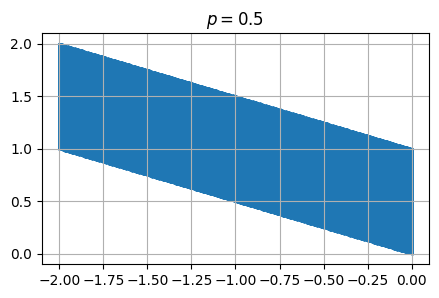

In [2]:
import numpy as np; import matplotlib.pyplot as plt
A = np.array([[-2, 0], [1, 1]]); b = np.array([0, 0])
x1, x2 = np.meshgrid(np.linspace(0, 1, 300), np.linspace(0, 1, 300))
X = np.c_[np.ravel(x1), np.ravel(x2)]; Y = X @ A.T + b; p = 1 / np.abs(A[0,0]*A[1,1]-A[1,0]*A[0,1])
_, ax = plt.subplots(1, 1, figsize=(5, 3)); ax.set_title('$p={}$'.format(p)); ax.grid(); ax.scatter(*Y.T, s=1);